In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# datasets

In [2]:
n_samples = 1500
# in the dataset class > we have two kinds of datasets
# 1. loading datasets > load_iri, load_boston
# 2. making ones

In [3]:
# factor = the ratio of the inner and outter radius
X, y = datasets.make_circles(n_samples=n_samples,
                                      factor=0.5,
                                      noise=.1)

In [4]:
X

array([[-0.90921304,  0.42627437],
       [ 0.94407801, -0.14094441],
       [-0.91756726,  0.14745407],
       ...,
       [-0.34594543, -0.29176588],
       [-0.88566619,  0.47873928],
       [-0.28759287,  0.74238951]])

In [7]:
print(X.shape)

(1500, 2)


In [8]:
y

array([0, 0, 0, ..., 1, 0, 1])

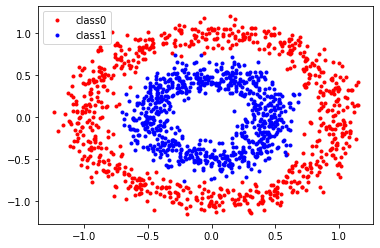

In [9]:
plt.plot(X[y == 0, 0], X[y == 0, 1], 'r.', label="class0")
plt.plot(X[y == 1, 0], X[y == 1, 1], 'b.', label="class1")
# the plot is like X2 and X1 and color shows the class

plt.legend()

(1500, 2)


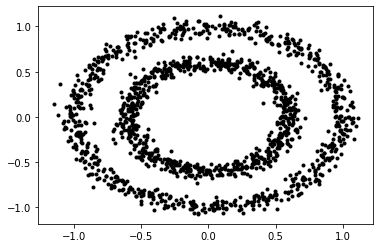

In [11]:
noisy_circles = datasets.make_circles(n_samples=n_samples,
                                      factor=0.6,
                                       noise=.05)[0]
print(noisy_circles.shape)
plt.plot(noisy_circles[:, 0], noisy_circles[:, 1], 'k.')
# plot all of the points without any labels > for clustering

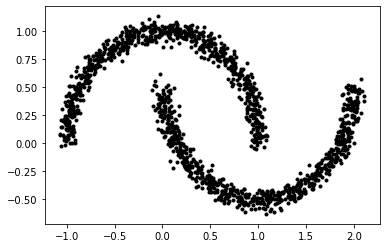

In [12]:
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)[0]

plt.plot(noisy_moons[:, 0], noisy_moons[:, 1], 'k.')

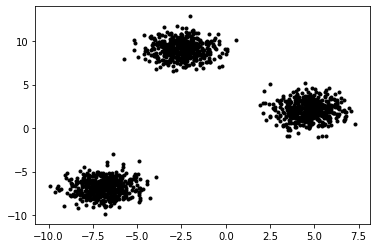

In [18]:
# random state is like random seed > same answer 
blobs = datasets.make_blobs(n_samples=n_samples, random_state=42)[0]

plt.plot(blobs[:, 0], blobs[:, 1], 'k.')

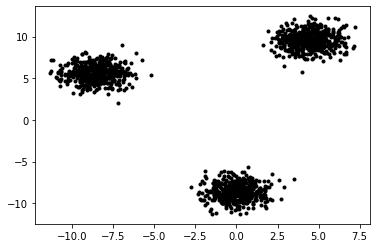

In [16]:
no_structure = np.random.rand(n_samples,)

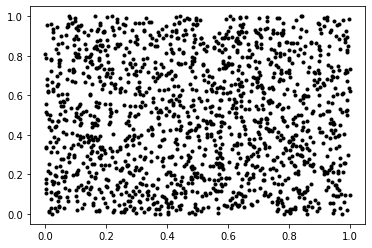

In [19]:
no_structure = np.random.rand(n_samples, 2)

plt.plot(no_structure[:, 0], no_structure[:, 1], 'k.')

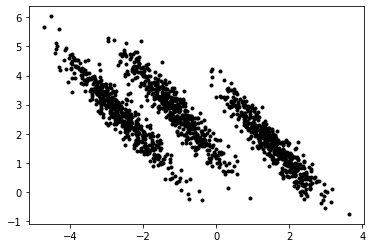

In [22]:
# create datasets like lines not blobs
aniso = datasets.make_blobs(n_samples=n_samples, random_state=3)[0]
# ansio 2*2 dot transformation 2*2 > geometric transformation
transformation = [[0.6, -0.6], [-0.4, 0.8]]
aniso = np.dot(aniso, transformation)

plt.plot(aniso[:, 0], aniso[:, 1], 'k.')

# clustring

In [23]:
clu = KMeans(n_clusters=3)
clu.fit(noisy_circles)

KMeans(n_clusters=3)

In [25]:
clu = KMeans(n_clusters=3)
clu.fit_transform(noisy_circles)

array([[1.21645112, 0.49909055, 0.7323092 ],
       [1.09536111, 0.16490809, 0.98605973],
       [1.62290431, 1.03645504, 0.68092198],
       ...,
       [1.39708945, 1.38354572, 0.27094039],
       [0.76733588, 1.6734396 , 1.02192868],
       [0.54283723, 0.65294474, 1.16714329]])

In [26]:
clu = KMeans(n_clusters=3)
clu.fit_predict(noisy_circles)

array([0, 0, 2, ..., 2, 1, 1], dtype=int32)

In [27]:
clu.labels_

array([0, 0, 2, ..., 2, 1, 1], dtype=int32)

In [28]:
clu.n_clusters

3

In [29]:
clu.cluster_centers_

array([[ 0.62706808, -0.23337321],
       [-0.10101647,  0.65194985],
       [-0.50539606, -0.42459917]])

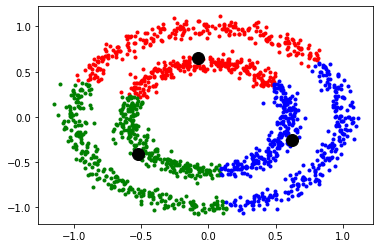

In [32]:
clu = KMeans(n_clusters=3)
clu.fit_predict(noisy_circles)
y = clu.labels_

colors = 'rgbycm'
for k in range(clu.n_clusters):
    plt.plot(noisy_circles[y == k, 0], noisy_circles[y == k, 1], colors[k] + '.')
    plt.plot(clu.cluster_centers_[k, 0], clu.cluster_centers_[k, 1], 'ko', markersize=12)

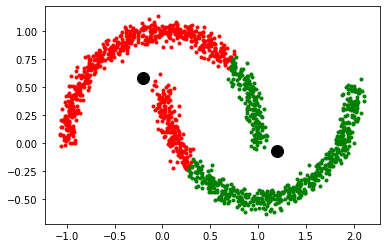

In [33]:
clu = KMeans(n_clusters=2)
clu.fit_transform(noisy_moons)
y = clu.labels_

colors = 'rgbycm'
for k in range(clu.n_clusters):
    plt.plot(noisy_moons[y == k, 0], noisy_moons[y == k, 1], colors[k] + '.')
    plt.plot(clu.cluster_centers_[k, 0], clu.cluster_centers_[k, 1], 'ko', markersize=12)

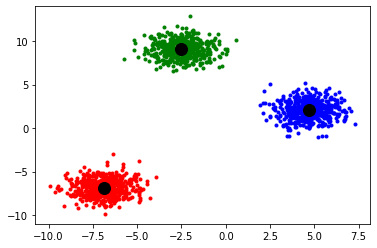

In [42]:
clu = KMeans(n_clusters=3)
clu.fit_transform(blobs)
y = clu.labels_

colors = 'rgbycm'
for k in range(clu.n_clusters):
    plt.plot(blobs[y == k, 0], blobs[y == k, 1], colors[k] + '.')
    plt.plot(clu.cluster_centers_[k, 0], clu.cluster_centers_[k, 1], 'ko', markersize=12)

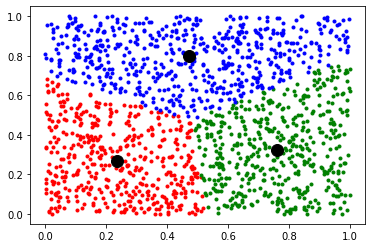

In [35]:
clu = KMeans(n_clusters=3)
clu.fit_transform(no_structure)
y = clu.labels_

colors = 'rgbycm'
for k in range(clu.n_clusters):
    plt.plot(no_structure[y == k, 0], no_structure[y == k, 1], colors[k] + '.')
    plt.plot(clu.cluster_centers_[k, 0], clu.cluster_centers_[k, 1], 'ko', markersize=12)

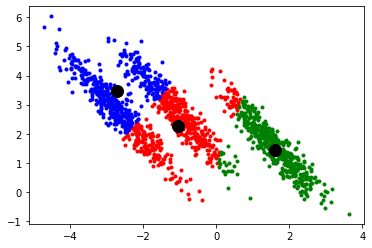

In [38]:
clu = KMeans(n_clusters=3)
clu.fit_transform(aniso)
y = clu.labels_

colors = 'rgbycm'
for k in range(clu.n_clusters):
    plt.plot(aniso[y == k, 0], aniso[y == k, 1], colors[k] + '.')
    plt.plot(clu.cluster_centers_[k, 0], clu.cluster_centers_[k, 1], 'ko', markersize=12)

# CVI

In [44]:
# the inner class distance
clu.inertia_

2925.388508444434

Text(0, 0.5, 'inertia')

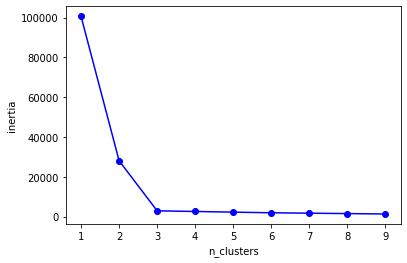

In [45]:
inertias = []

for n_clusters in range(1, 10):
    clu = KMeans(n_clusters=n_clusters)
    clu.fit_transform(blobs)
    inertias.append(clu.inertia_)
    
plt.plot(range(1, 10), inertias, 'bo-')
plt.xlabel('n_clusters')
plt.ylabel('inertia')

# the best cluster is 3

(1500, 10)


Text(0, 0.5, 'inertia')

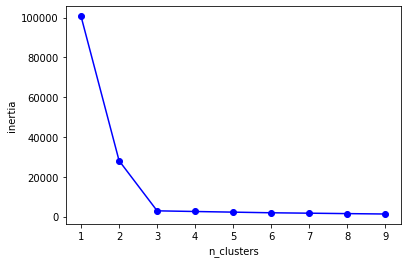

In [47]:
# 10D and can't plot
blobs10 = datasets.make_blobs(n_samples=n_samples, random_state=42, n_features=10)[0]
print(blobs10.shape)

inertias = []

for n_clusters in range(1, 10):
    clu = KMeans(n_clusters=n_clusters)
    clu.fit_transform(blobs)
    inertias.append(clu.inertia_)
    
plt.plot(range(1, 10), inertias, 'bo-')
plt.xlabel('n_clusters')
plt.ylabel('inertia')